# Predicting Attrition on IBM employees

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV

columns = [
    'Attrition',
    'OverTime',
    'DistanceFromHome',
    'NumCompaniesWorked',
    'YearsAtCompany',
    'StockOptionLevel',
    'YearsWithCurrManager',
    'Age',
    'MonthlyIncome',
    'YearsInCurrentRole',
    'JobLevel',
    'TotalWorkingYears'
]

csv = pd.read_csv('ibm.csv')
ibm = csv[columns]

# Dividing data into features and target
X = ibm.drop(columns=['Attrition'])
y = ibm['Attrition']

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the data to use when needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbors (KNN)

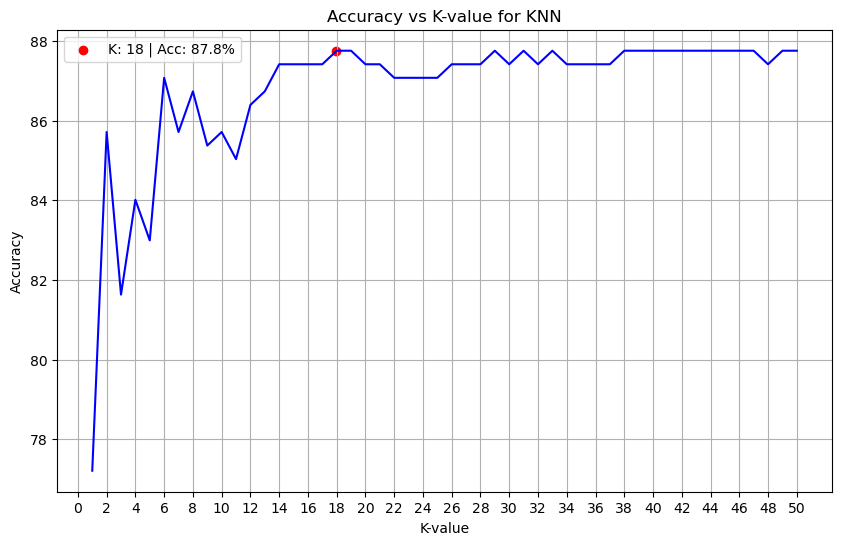

Accuracy: 87.8%

Classification Report
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix
 [[254   1]
 [ 35   4]]


In [12]:
from sklearn.neighbors import KNeighborsClassifier

KNN_results = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_results.append({'K-value': k, 'Accuracy': accuracy*100})

KNN_accuracy_df = pd.DataFrame(KNN_results)

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for K
KNN_model = KNeighborsClassifier(n_neighbors = KNN_k_max)
KNN_model.fit(X_train, y_train.values.ravel())
KNN_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test.values.ravel(), KNN_pred)
KNN_cr = classification_report(y_test.values.ravel(), KNN_pred)
KNN_cm = confusion_matrix(y_test.values.ravel(), KNN_pred)

# Printing the metrics
print("Accuracy:", f"{KNN_accuracy * 100:.1f}%\n")
print("Classification Report\n", KNN_cr)
print("Confusion Matrix\n", KNN_cm)

## Decision Tree

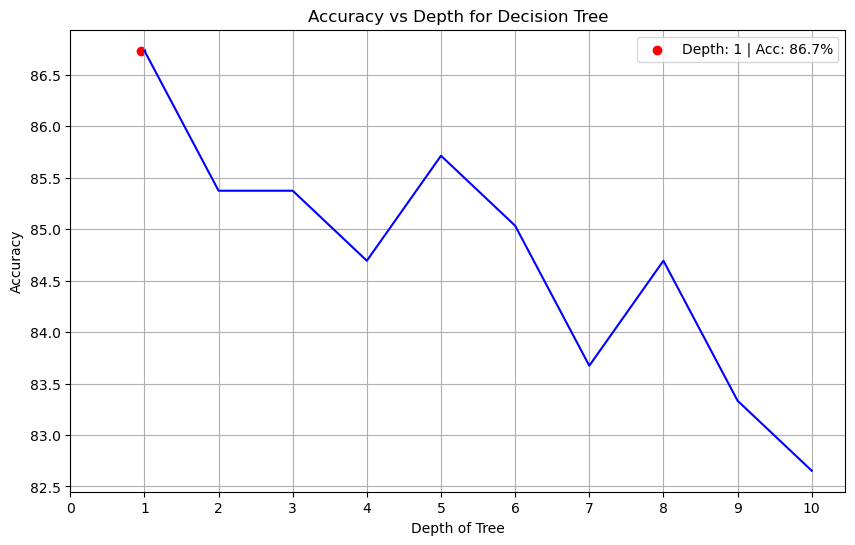

Accuracy: 86.7%

Classification Report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Confusion Matrix
 [[255   0]
 [ 39   0]]


C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [13]:
from sklearn.tree import DecisionTreeClassifier

DT_results = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.values.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_results.append({'Depth': i, 'Accuracy': accuracy*100})
    
DT_accuracy_df = pd.DataFrame(DT_results)

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 11, 1))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for Depth
DT_model = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = DT_depth_max)
DT_model.fit(X_train, y_train.values.ravel())
DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test.values.ravel(), DT_pred)
DT_cr = classification_report(y_test.values.ravel(), DT_pred)
DT_cm = confusion_matrix(y_test.values.ravel(), DT_pred)

# Printing the metrics
print("Accuracy:", f"{DT_accuracy * 100:.1f}%\n")
print("Classification Report\n", DT_cr)
print("Confusion Matrix\n", DT_cm)

## Random Forest

Best combination
Depth          2.000000
Estimators     7.000000
Accuracy      87.414966
Name: 1, dtype: float64


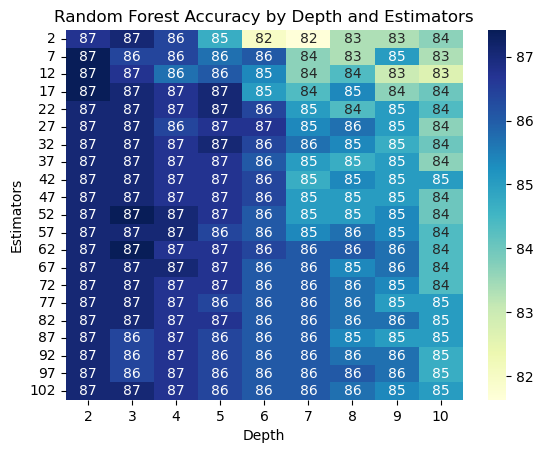

Accuracy: 87.4%

Classification Report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294

Confusion Matrix
 [[255   0]
 [ 37   2]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

max_depth_values = list(range(2, 11))  # Test max_depth from 2 to 10
n_estimators_values = list(range(2, 103, 5))  # Test n_estimators from 2 to 102 with step size 5

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.values.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

# Creating the model using the optimum value for Depth
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X_train, y_train.values.ravel())
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test.values.ravel(), RF_pred)
RF_cr = classification_report(y_test.values.ravel(), RF_pred)
RF_cm = confusion_matrix(y_test.values.ravel(), RF_pred)

# Printing the metrics
print("Accuracy:", f"{RF_accuracy * 100:.1f}%\n")
print("Classification Report\n", RF_cr)
print("Confusion Matrix\n", RF_cm)

## Support Vector Machines

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid

# Grid search for the best parameters
SVM_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
SVM_grid = GridSearchCV(SVC(), SVM_param_grid, refit = True, verbose = 0)
SVM_grid.fit(X_train, y_train.values.ravel())
print(SVM_grid.best_estimator_)

# Creating the model using the best parameters from the Grid Search
SVM_pred = SVM_grid.predict(X_test)
SVM_accuracy = accuracy_score(y_test.values.ravel(), SVM_pred)
SVM_cr = classification_report(y_test.values.ravel(), SVM_pred)
SVM_cm = confusion_matrix(y_test.values.ravel(), SVM_pred)

# Printing the metrics
print("Accuracy:", f"{SVM_accuracy * 100:.1f}%\n")
print("Classification Report\n", SVM_cr)
print("Confusion Matrix\n", SVM_cm)

SVC(C=100, gamma=0.01)
Accuracy: 86.1%

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.38      0.08      0.13        39

    accuracy                           0.86       294
   macro avg       0.62      0.53      0.53       294
weighted avg       0.81      0.86      0.82       294

Confusion Matrix
 [[250   5]
 [ 36   3]]


## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# Unlike the other models, Naive Bayes has no parameters that need tuning
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.values.ravel())
NB_pred = NB_model.predict(X_test)
NB_accuracy = accuracy_score(y_test.values.ravel(), NB_pred)
NB_cr = classification_report(y_test.values.ravel(), NB_pred)
NB_cm = confusion_matrix(y_test.values.ravel(), NB_pred)

# Printing the metrics
print("Accuracy:", f"{NB_accuracy * 100:.1f}%\n")
print("Classification Report\n", NB_cr)
print("Confusion Matrix\n", NB_cm)

Accuracy: 77.9%

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       255
           1       0.24      0.31      0.27        39

    accuracy                           0.78       294
   macro avg       0.56      0.58      0.57       294
weighted avg       0.80      0.78      0.79       294

Confusion Matrix
 [[217  38]
 [ 27  12]]


## Logistic Regression

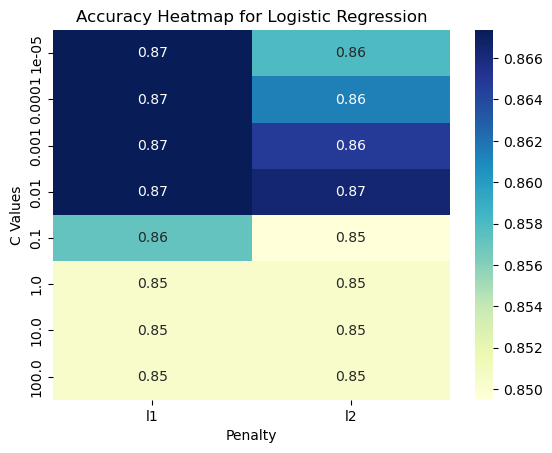

Best hyperparameters
C             0.00001
Solver      liblinear
Penalty            l1
Accuracy     0.867347
Name: 0, dtype: object

Accuracy: 86.7%

Classification Report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Confusion Matrix
 [[255   0]
 [ 39   0]]


C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define ranges for hyperparameters
penalty_values = ['l1', 'l2']
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]  # List of C values to test
solver_values = ['liblinear', 'saga', 'sag', 'lbfgs']  # Different solvers supporting both 'l1' and 'l2' penalties

# Perform grid search
LR_results = []

for params in ParameterGrid({'penalty': penalty_values, 'C': C_values, 'solver': solver_values}):
    if (params['solver'] in ['lbfgs', 'sag']) and params['penalty'] == 'l1':
        continue  # Skip 'lbfgs' and 'sag' solvers with 'l1' penalty
    clf_lr = LogisticRegression(**params)
    clf_lr.fit(X_train, y_train.values.ravel())
    yhat = clf_lr.predict(X_test)
    accuracy = accuracy_score(y_test.values.ravel(), yhat)
    LR_results.append({'Penalty': params['penalty'], 'C': params['C'], 'Solver': params['solver'], 'Accuracy': accuracy})

LR_results_df = pd.DataFrame(LR_results)
pivot_table = LR_results_df.pivot_table(index='C', columns='Penalty', values='Accuracy')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Accuracy Heatmap for Logistic Regression')
plt.xlabel('Penalty')
plt.ylabel('C Values')
plt.show()

# Find the row index with the maximum accuracy
best_row_index = LR_results_df['Accuracy'].idxmax()

# Get the corresponding hyperparameters for the best result
best_hyperparameters = LR_results_df.loc[best_row_index, ['C', 'Solver', 'Penalty', 'Accuracy']]
best_C = best_hyperparameters['C']
best_solver = best_hyperparameters['Solver']
best_penalty = best_hyperparameters['Penalty']

print("Best hyperparameters")
print(best_hyperparameters)

# Fitting the model with the best hyperparameters
LR_model = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
LR_model.fit(X_train, y_train.values.ravel())
LR_pred = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test.values.ravel(), LR_pred)
LR_cr = classification_report(y_test.values.ravel(), LR_pred)
LR_cm = confusion_matrix(y_test.values.ravel(), LR_pred)

# Printing the metrics
print("\nAccuracy:", f"{LR_accuracy * 100:.1f}%\n")
print("Classification Report\n", LR_cr)
print("Confusion Matrix\n", LR_cm)

## Stochastic Gradient

In [20]:
from sklearn.linear_model import SGDClassifier

# Define hyperparameters for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['hinge', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

# Initialize SGDClassifier
sgd = SGDClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("\n")

# Fit a model using the best parameters
SGD_model = SGDClassifier(**best_params)
SGD_model.fit(X_train, y_train.values.ravel())
SGD_pred = SGD_model.predict(X_test)
SGD_accuracy = accuracy_score(y_test, SGD_pred)
SGD_cr = classification_report(y_test.values.ravel(), SGD_pred)
SGD_cm = confusion_matrix(y_test.values.ravel(), SGD_pred)

# Printing the metrics
print("Accuracy:", f"{SGD_accuracy * 100:.1f}%\n")
print("Classification Report\n", SGD_cr)
print("Confusion Matrix\n", SGD_cm)

Best Parameters: {'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'l2'}
Best Score: 0.8537504507753335


Accuracy: 86.4%

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.33      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.60      0.51      0.49       294
weighted avg       0.80      0.86      0.81       294

Confusion Matrix
 [[253   2]
 [ 38   1]]


## XGBoost

In [22]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term (alpha)
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term (lambda)
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and fit a model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
XGB_model = xgb.XGBClassifier(**best_params)
XGB_model.fit(X_train, y_train.values.ravel())
XGB_pred = XGB_model.predict(X_test)
XGB_accuracy = accuracy_score(y_test, XGB_pred)
XGB_cr = classification_report(y_test.values.ravel(), XGB_pred)
XGB_cm = confusion_matrix(y_test.values.ravel(), XGB_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{XGB_accuracy * 100:.1f}%\n")
print("Classification Report\n", XGB_cr)
print("Confusion Matrix\n", XGB_cm)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.1}


Accuracy: 84.4%

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.33      0.18      0.23        39

    accuracy                           0.84       294
   macro avg       0.61      0.56      0.57       294
weighted avg       0.81      0.84      0.82       294

Confusion Matrix
 [[241  14]
 [ 32   7]]


## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search_gbm = GridSearchCV(gbm, param_grid=param_grid_gbm, cv=5)
grid_search_gbm.fit(X_train, y_train.values.ravel())

best_gbm = grid_search_gbm.best_estimator_
best_gbm.fit(X_train, y_train.values.ravel())
gbm_pred = best_gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test.values.ravel(), gbm_pred)
gbm_cr = classification_report(y_test.values.ravel(), gbm_pred)
gbm_cm = confusion_matrix(y_test.values.ravel(), gbm_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{gbm_accuracy * 100:.1f}%\n")
print("Classification Report\n", gbm_cr)
print("Confusion Matrix\n", gbm_cm)



Accuracy: 83.3%

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.19      0.08      0.11        39

    accuracy                           0.83       294
   macro avg       0.53      0.51      0.51       294
weighted avg       0.78      0.83      0.80       294

Confusion Matrix
 [[242  13]
 [ 36   3]]


## AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search_adaboost = GridSearchCV(adaboost, param_grid=param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train.values.ravel())

best_adaboost = grid_search_adaboost.best_estimator_
best_adaboost.fit(X_train, y_train.values.ravel())
adaboost_pred = best_adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test.values.ravel(), adaboost_pred)
adaboost_cr = classification_report(y_test.values.ravel(), adaboost_pred)
adaboost_cm = confusion_matrix(y_test.values.ravel(), adaboost_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{adaboost_accuracy * 100:.1f}%\n")
print("Classification Report\n", adaboost_cr)
print("Confusion Matrix\n", adaboost_cm)



Accuracy: 85.4%

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.33      0.10      0.16        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.54       294
weighted avg       0.80      0.85      0.82       294

Confusion Matrix
 [[247   8]
 [ 35   4]]


## Perceptron

In [25]:
from sklearn.linear_model import Perceptron

# Define the Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)

# Define the grid of parameters to search
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=perceptron_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)

# Fit a model with the best params
perceptron_classifier = Perceptron(**best_params)
perceptron_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on test data
perceptron_pred = perceptron_classifier.predict(X_test)
perceptron_accuracy = accuracy_score(y_test.values.ravel(), perceptron_pred)
perceptron_cr = classification_report(y_test.values.ravel(), perceptron_pred)
perceptron_cm = confusion_matrix(y_test.values.ravel(), perceptron_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{perceptron_accuracy * 100:.1f}%\n")
print("Classification Report\n", perceptron_cr)
print("Confusion Matrix\n", perceptron_cm)

Best Parameters: {'alpha': 0.0001}


Accuracy: 80.3%

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       255
           1       0.17      0.13      0.15        39

    accuracy                           0.80       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.80      0.79       294

Confusion Matrix
 [[231  24]
 [ 34   5]]


## Bagging

In [26]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

grid_search_bagging = GridSearchCV(bagging, param_grid=param_grid_bagging, cv=5)
grid_search_bagging.fit(X_train, y_train.values.ravel())

best_bagging = grid_search_bagging.best_estimator_
best_bagging.fit(X_train, y_train.values.ravel())
bagging_pred = best_bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test.values.ravel(), bagging_pred)
bagging_cr = classification_report(y_test.values.ravel(), bagging_pred)
bagging_cm = confusion_matrix(y_test.values.ravel(), bagging_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{bagging_accuracy * 100:.1f}%\n")
print("Classification Report\n", bagging_cr)
print("Confusion Matrix\n", bagging_cm)



Accuracy: 84.0%

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.28      0.13      0.18        39

    accuracy                           0.84       294
   macro avg       0.58      0.54      0.54       294
weighted avg       0.80      0.84      0.81       294

Confusion Matrix
 [[242  13]
 [ 34   5]]


## Extra Trees

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier()
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search_extra_trees = GridSearchCV(extra_trees, param_grid=param_grid_extra_trees, cv=5)
grid_search_extra_trees.fit(X_train, y_train.values.ravel())

best_extra_trees = grid_search_extra_trees.best_estimator_
best_extra_trees.fit(X_train, y_train.values.ravel())
extra_trees_pred = best_extra_trees.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test.values.ravel(), extra_trees_pred)
extra_trees_cr = classification_report(y_test.values.ravel(), extra_trees_pred)
extra_trees_cm = confusion_matrix(y_test.values.ravel(), extra_trees_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{extra_trees_accuracy * 100:.1f}%\n")
print("Classification Report\n", extra_trees_cr)
print("Confusion Matrix\n", extra_trees_cm)



Accuracy: 87.1%

Classification Report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.77      0.52      0.51       294
weighted avg       0.85      0.87      0.82       294

Confusion Matrix
 [[254   1]
 [ 37   2]]


## Multi-Layer Perceptron

In [28]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_mlp = GridSearchCV(mlp_classifier, param_grid=param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train.values.ravel())

best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train.values.ravel())
mlp_pred = best_mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test.values.ravel(), mlp_pred)
mlp_cr = classification_report(y_test.values.ravel(), mlp_pred)
mlp_cm = confusion_matrix(y_test.values.ravel(), mlp_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{mlp_accuracy * 100:.1f}%\n")
print("Classification Report\n", mlp_cr)
print("Confusion Matrix\n", mlp_cm)



Accuracy: 85.7%

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.40      0.15      0.22        39

    accuracy                           0.86       294
   macro avg       0.64      0.56      0.57       294
weighted avg       0.82      0.86      0.83       294

Confusion Matrix
 [[246   9]
 [ 33   6]]


## Gaussian Process

In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define the Gaussian Process Classifier
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)

# Define the grid of parameters to search
param_grid_gpc = {
    "max_iter_predict": [100, 200, 300],
    # Add more parameters to be tuned as needed for the GPC model
}

# Perform Grid Search with cross-validation
grid_search_gpc = GridSearchCV(estimator=gpc, param_grid=param_grid_gpc, cv=3, scoring='accuracy')
grid_search_gpc.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_gpc = grid_search_gpc.best_params_
best_accuracy_gpc = grid_search_gpc.best_score_

print("Best Parameters for Gaussian Process Classifier:", best_params_gpc)

# Fit a model with the best params
gpc = GaussianProcessClassifier(**best_params_gpc)
gpc.fit(X_train, y_train.values.ravel())

# Make predictions on test data
gpc_pred = gpc.predict(X_test)
gpc_accuracy = accuracy_score(y_test.values.ravel(), gpc_pred)
gpc_cr = classification_report(y_test.values.ravel(), gpc_pred)
gpc_cm = confusion_matrix(y_test.values.ravel(), gpc_pred)

# Printing the metrics for GPC
print("Accuracy:", f"{gpc_accuracy * 100:.1f}%\n")
print("Classification Report\n", gpc_cr)
print("Confusion Matrix\n", gpc_cm)

Best Parameters for Gaussian Process Classifier: {'max_iter_predict': 100}
Accuracy: 86.1%

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.38      0.08      0.13        39

    accuracy                           0.86       294
   macro avg       0.62      0.53      0.53       294
weighted avg       0.81      0.86      0.82       294

Confusion Matrix
 [[250   5]
 [ 36   3]]


## Quadratic Discriminant Analysis

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()

# Define the grid of parameters to search
param_grid_qda = {
    "tol": [0.0001, 0.001, 0.01],
    # Add more parameters to be tuned as needed for the QDA model
}

# Perform Grid Search with cross-validation
grid_search_qda = GridSearchCV(estimator=qda, param_grid=param_grid_qda, cv=3, scoring='accuracy')
grid_search_qda.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_qda = grid_search_qda.best_params_
best_accuracy_qda = grid_search_qda.best_score_

print("Best Parameters for Quadratic Discriminant Analysis:", best_params_qda)

# Fit a model with the best params
qda = QuadraticDiscriminantAnalysis(**best_params_qda)
qda.fit(X_train, y_train.values.ravel())

# Make predictions on test data
qda_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test.values.ravel(), qda_pred)
qda_cr = classification_report(y_test.values.ravel(), qda_pred)
qda_cm = confusion_matrix(y_test.values.ravel(), qda_pred)

# Printing the metrics for QDA
print("Accuracy:", f"{qda_accuracy * 100:.1f}%\n")
print("Classification Report\n", qda_cr)
print("Confusion Matrix\n", qda_cm)

Best Parameters for Quadratic Discriminant Analysis: {'tol': 0.0001}
Accuracy: 82.0%

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       255
           1       0.31      0.28      0.29        39

    accuracy                           0.82       294
   macro avg       0.60      0.59      0.60       294
weighted avg       0.81      0.82      0.82       294

Confusion Matrix
 [[230  25]
 [ 28  11]]


## CatBoost

In [31]:
from catboost import CatBoostClassifier

# Define the CatBoost Classifier
catboost = CatBoostClassifier(verbose=False)

# Define the grid of parameters to search
param_grid_catboost = {
    "depth": [4, 6, 8],
    # Add more parameters to be tuned as needed for the CatBoost model
}

# Perform Grid Search with cross-validation
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_catboost = grid_search_catboost.best_params_
best_accuracy_catboost = grid_search_catboost.best_score_

print("Best Parameters for CatBoost Classifier:", best_params_catboost)

# Fit a model with the best params
catboost = CatBoostClassifier(**best_params_catboost, verbose=False)
catboost.fit(X_train, y_train.values.ravel())

# Make predictions on test data
catboost_pred = catboost.predict(X_test)
catboost_accuracy = accuracy_score(y_test.values.ravel(), catboost_pred)
catboost_cr = classification_report(y_test.values.ravel(), catboost_pred)
catboost_cm = confusion_matrix(y_test.values.ravel(), catboost_pred)

# Printing the metrics for CatBoost
print("Accuracy:", f"{catboost_accuracy * 100:.1f}%\n")
print("Classification Report\n", catboost_cr)
print("Confusion Matrix\n", catboost_cm)

Best Parameters for CatBoost Classifier: {'depth': 8}
Accuracy: 84.7%

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.31      0.13      0.18        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.55       294
weighted avg       0.80      0.85      0.82       294

Confusion Matrix
 [[244  11]
 [ 34   5]]


# Model Summary

In [32]:
models = [
    "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Support Vector Machines",
    "Naive Bayes", "Logistic Regression", "Stochastic Gradient", "XGBoost",
    "Perceptron", "Gradient Boosting", "Adaboost", "Bagging", "Extra Trees",
    "Multi-layer Perceptron", "Gaussian Process", "Quadratic Discriminant", "CatBoost"
]

accuracies = [
    KNN_accuracy, DT_accuracy, RF_accuracy, SVM_accuracy, NB_accuracy,
    LR_accuracy, SGD_accuracy, XGB_accuracy, perceptron_accuracy,
    gbm_accuracy, adaboost_accuracy, bagging_accuracy, extra_trees_accuracy,
    mlp_accuracy, gpc_accuracy, qda_accuracy, catboost_accuracy
]

classification_reports = [
    KNN_cr, DT_cr, RF_cr, SVM_cr, NB_cr,
    LR_cr, SGD_cr, XGB_cr, perceptron_cr,
    gbm_cr, adaboost_cr, bagging_cr, extra_trees_cr,
    mlp_cr, gpc_cr, qda_cr, catboost_cr
]

confusion_matrices = [
    KNN_cm, DT_cm, RF_cm, SVM_cm, NB_cm,
    LR_cm, SGD_cm, XGB_cm, perceptron_cm,
    gbm_cm, adaboost_cm, bagging_cm, extra_trees_cm,
    mlp_cm, gpc_cm, qda_cm, catboost_cm
]

predictions = [
    KNN_pred, DT_pred, RF_pred, SVM_pred, NB_pred,
    LR_pred, SGD_pred, XGB_pred, perceptron_pred,
    gbm_pred, adaboost_pred, bagging_pred, extra_trees_pred,
    mlp_pred, gpc_pred, qda_pred, catboost_pred
]

## Accuracy

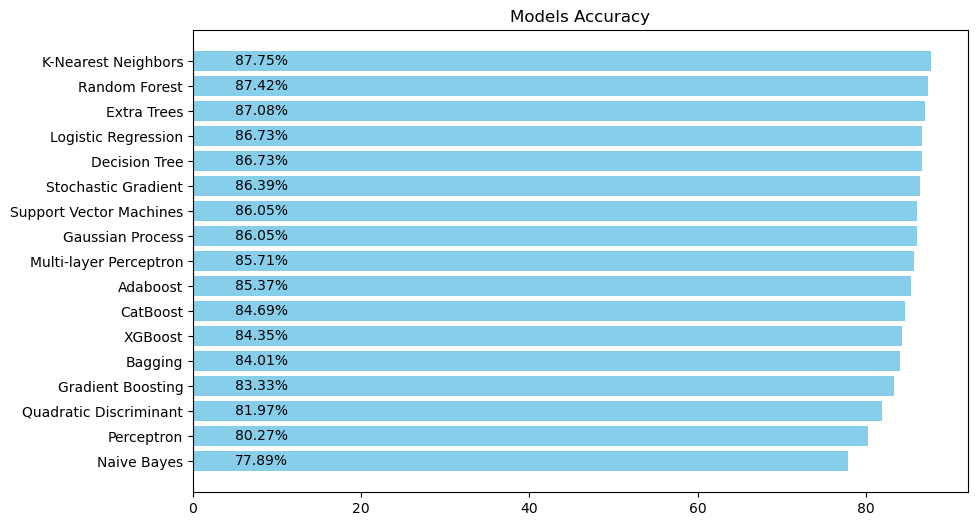

In [44]:
accuracy_df = pd.DataFrame({'Model Name': models, 'Accuracy': accuracies})
accuracy_df['Accuracy'] = round(accuracy_df['Accuracy']*100, 3)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(accuracy_df['Model Name'], accuracy_df['Accuracy'], color='skyblue')
plt.title('Models Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding accuracy values inside each bar
for bar, accuracy in zip(bars, accuracy_df['Accuracy']):
    plt.text(5, bar.get_y() + bar.get_height() / 2, f'{accuracy:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot as a PNG file
plt.savefig('Models_Accuracy.png', bbox_inches='tight')
plt.show()

## Confusion Matrices

In [34]:
# Initialize lists to store TP, TN, FP, FN values
TP_list, TN_list, FP_list, FN_list = [], [], [], []

for cm in confusion_matrices:
    TP = cm[1][1] if len(cm) == 2 else 0
    TN = cm[0][0] if len(cm) == 2 else cm[1][1]
    FP = cm[0][1] if len(cm) == 2 else 0
    FN = cm[1][0] if len(cm) == 2 else 0
    
    TP_list.append(TP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)

# Create the DataFrame
cm_data = {
    'Model Name': models,
    'TP': TP_list,
    'TN': TN_list,
    'FP': FP_list,
    'FN': FN_list
}

cm_df = pd.DataFrame(cm_data)
cm_df

,Model Name,TP,TN,FP,FN
0,K-Nearest Neighbors,4,254,1,35
1,Decision Tree,0,255,0,39
2,Random Forest,2,255,0,37
3,Support Vector Machines,3,250,5,36
4,Naive Bayes,12,217,38,27
5,Logistic Regression,0,255,0,39
6,Stochastic Gradient,1,253,2,38
7,XGBoost,7,241,14,32
8,Perceptron,5,231,24,34
9,Gradient Boosting,3,242,13,36


## Classification Reports

In [36]:
# Initialize lists to store metrics
model_names = []
precision_list, recall_list, f1_list = [], [], []

for model, prediction in zip(models, predictions):
    if model == "XGBoost":
        report = classification_report(y_test.values.ravel(), prediction, output_dict=True)
    else:
        report = classification_report(y_test.values.ravel(), prediction, output_dict=True)
    
    precision = round(report['weighted avg']['precision']*100, 3)
    recall = round(report['weighted avg']['recall']*100, 3)
    f1 = round(report['weighted avg']['f1-score']*100, 3)
    
    model_names.append(model)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Create the DataFrame including accuracy and ROC-AUC score
cr_data = {
    'Model Name': model_names,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list
}

cr_df = pd.DataFrame(cr_data)
cr_df

C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.mantovani\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

,Model Name,Precision,Recall,F1-Score
0,K-Nearest Neighbors,86.843,87.755,83.407
1,Decision Tree,75.229,86.735,80.573
2,Random Forest,89.010,87.415,82.162
3,Support Vector Machines,80.792,86.054,81.855
4,Naive Bayes,80.321,77.891,79.014
5,Logistic Regression,75.229,86.735,80.573
6,Stochastic Gradient,79.830,86.395,81.012
7,XGBoost,80.990,84.354,82.274
8,Perceptron,77.894,80.272,79.011
9,Gradient Boosting,77.990,83.333,80.208


## All metrics

In [43]:
import dataframe_image as dfi

metrics = accuracy_df.merge(cr_df, on='Model Name', how='inner')
metrics = metrics.merge(cm_df, on='Model Name', how='inner')
metrics['Correct'] = metrics['TP'] + metrics['TN']
metrics['Wrong'] = metrics['FP'] + metrics['FN']
metrics
dfi.export(metrics, 'Metrics.png')